In [80]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

#### Loading the Data

In [3]:
#Importing dataset 

df=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Data Exploration

In [5]:
# Datatypes of all columns
print(df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [6]:
# structure of dataset
df.shape

(14204, 12)

In [7]:
# Summary of dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#check the null values present or not 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [11]:
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean())

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
df.shape

(14204, 12)

In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1321.864430
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,1468.089000
50%,12.600000,0.062347,142.247000,1999.000000,2181.288914
75%,16.750000,0.094037,185.855600,2004.000000,2181.288914
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


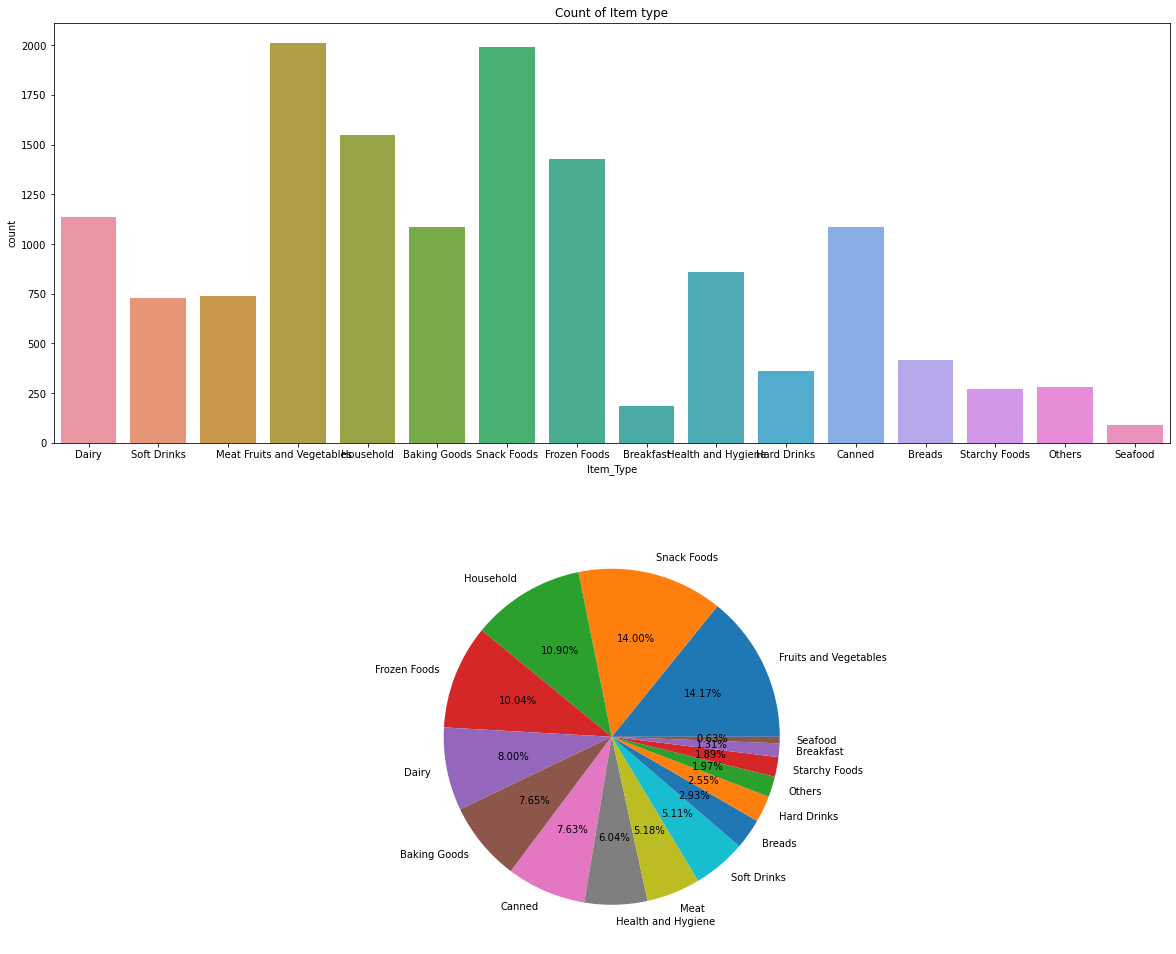

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (20, 17))
ax[0].set_title("Count of Item type")                  # Set the title of the graph
percentage = df["Item_Type"].value_counts()                 # value_counts: returns the count of values in series: return series
labels = list(df["Item_Type"].value_counts().index)                            # Converting the index of value counts into list

    
sns.countplot(x = df["Item_Type"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

Snacks foods and fruits and vegetables have the highest rates 14% & 14.17%

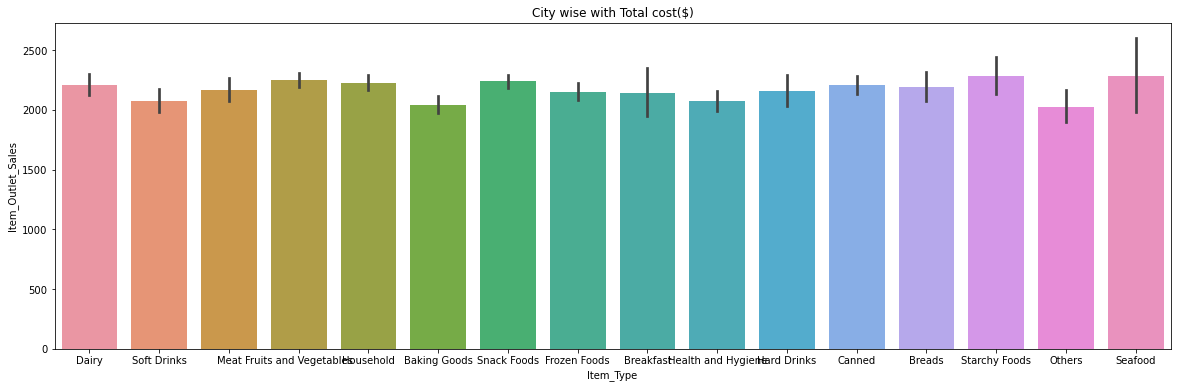

In [20]:
fig,ax = plt.subplots(figsize=(20,6))
plt.title('City wise with Total cost($)')
sns.barplot(x=df['Item_Type'],y=df['Item_Outlet_Sales'],data=df ,estimator=np.mean)
plt.show()

In [28]:
#checking the column
df_c=df
columns=df_c.columns
columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [31]:
#separate the dataset into categorical as well as numerical types

a=df_c.select_dtypes(exclude='object')
b=df_c.select_dtypes(include='object')

a_lst=list(a.columns)
b_lst=list(b.columns)
print(tabulate({'categorical':b_lst,"continuous":a_lst},headers=['Categories','Numerical']))

Categories    Numerical
------------  -------------------------
              Item_Identifier
              Item_Weight
              Item_Fat_Content
              Item_Visibility
              Item_Type
              Item_MRP
              Outlet_Identifier
              Outlet_Establishment_Year
              Outlet_Size
              Outlet_Location_Type
              Outlet_Type
              Item_Outlet_Sales


In [32]:
purpose_encoder = preprocessing.LabelEncoder() # Using Label Encoder technique to convert categorical column into numerical type
for i in b_lst:     
    purpose_encoder.fit(['df[i]'])
    print(purpose_encoder.classes_)
    df['i'] = purpose_encoder.transform(df[i])

df_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_df = df_c.select_dtypes(include=numerics)
    if scale == 'datascaling':
            scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
    return df_scaled

In [36]:
scale = 'datascaling' 
df_scaled=feature_scale(scale)
df_scaled

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.282525,0.038399,0.927507,0.583333,0.283587
1,0.081274,0.048346,0.072068,1.000000,0.031419
2,0.770765,0.040593,0.468288,0.583333,0.158115
3,0.871986,0.218055,0.640093,0.541667,0.053555
4,0.260494,0.186950,0.095805,0.083333,0.073651
...,...,...,...,...,...
14199,0.353974,0.030546,0.467004,0.500000,0.164551
14200,0.181304,0.429216,0.585126,1.000000,0.164551
14201,0.324204,0.215364,0.371199,0.708333,0.164551
14202,0.639774,0.188211,0.778154,0.916667,0.164551


#### LinearRegression

In [40]:
#seperating dependent and independent column
X=df_scaled.drop(columns='Item_Outlet_Sales').to_numpy()
y=df_scaled['Item_Outlet_Sales'].to_numpy()

In [41]:
cv = KFold(n_splits=3, shuffle=True, random_state=1) #splitting data

In [42]:
for train, test in cv.split(X,y):
    X_train, X_test=X[train],X[test]
    y_train, y_test=y[train],y[test]

In [43]:
#building model
model1=LinearRegression() 

In [44]:
#fitting model
reg1=model1.fit(X_train, y_train) 

In [45]:
#predicting values
y1_pred=reg1.predict(X_test) 
y1_pred 

array([0.25578068, 0.17566849, 0.14217819, ..., 0.13684702, 0.21350709,
       0.11161601])

In [46]:
#evaluating models 

scoring=['r2','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error','neg_median_absolute_error']
scores1 = cross_validate(model1, X, y, scoring=scoring, cv=cv) 

In [47]:
m1s1=(scores1['test_r2'])
m1s2=(scores1['test_neg_mean_squared_error'])
m1s3=(scores1['test_neg_root_mean_squared_error'])
m1s4=(scores1['test_neg_mean_absolute_percentage_error'])
m1s5=(scores1['test_neg_median_absolute_error'])

In [48]:
print(f'''r2:{mean(m1s1)}
MSE:{mean(m1s2)}
RMSE:{mean(m1s3)}
MAPE:{mean(m1s4)}
MAE:{mean(m1s5)}''')

r2:0.20608620115301687
MSE:-0.008136318770314099
RMSE:-0.09019766796224922
MAPE:-55230793764.6279
MAE:-0.04872993502183572


#### Random Forest Regressor

In [49]:
model2 = RandomForestRegressor() #building model

In [50]:
reg2=model2.fit(X_train, y_train) #fitting model

In [51]:
y2_pred=reg2.predict(X_test) #predicting values
y2_pred 

array([0.28730479, 0.17504267, 0.14696735, ..., 0.1418185 , 0.23602186,
       0.15443277])

In [52]:
scores2 = cross_validate(model2, X, y, scoring=scoring, cv=cv) #model evaluation

In [53]:
m2s1=(scores2['test_r2'])
m2s2=(scores2['test_neg_mean_squared_error'])
m2s3=(scores2['test_neg_root_mean_squared_error'])
m2s4=(scores2['test_neg_mean_absolute_percentage_error'])
m2s5=(scores2['test_neg_median_absolute_error'])

In [54]:
print(f'''r2:{mean(m2s1)}
MSE:{mean(m2s2)}
RMSE:{mean(m2s3)}
MAPE:{mean(m2s4)}
MAE:{mean(m2s5)}''')

r2:0.17423141776675147
MSE:-0.008458992277633273
RMSE:-0.09197219163160734
MAPE:-61795668955.976776
MAE:-0.05184175215849393


#### Ada Boost Regressor

In [55]:
model3 = AdaBoostRegressor() #building mmodel

In [56]:
reg3=model3.fit(X_train, y_train) #fitting model

In [57]:
y3_pred=reg3.predict(X_test) #predicting values
y3_pred 

array([0.26982808, 0.1685536 , 0.13089287, ..., 0.15520463, 0.23836154,
       0.10949857])

In [58]:
scores3 = cross_validate(model3, X, y, scoring=scoring, cv=cv) #model evaluation

In [59]:
m3s1=(scores3['test_r2'])
m3s2=(scores3['test_neg_mean_squared_error'])
m3s3=(scores3['test_neg_root_mean_squared_error'])
m3s4=(scores3['test_neg_mean_absolute_percentage_error'])
m3s5=(scores3['test_neg_median_absolute_error'])

In [60]:
print(f'''r2:{mean(m3s1)}
MSE:{mean(m3s2)}
RMSE:{mean(m3s3)}
MAPE:{mean(m3s4)}
MAE:{mean(m3s5)}''')

r2:0.11691534126101726
MSE:-0.009045298650680161
RMSE:-0.0951054611680684
MAPE:-62795309431.82981
MAE:-0.05959257353365519


#### Stacking

In [62]:
estimator=[('lr',LinearRegression()),('knn',KNeighborsRegressor()),('tree',DecisionTreeRegressor()),('svm',SVR())]
final_estimators=LinearRegression()
model4 = StackingRegressor(estimators=estimator, final_estimator=final_estimators, cv=3) #building model

In [63]:
reg4=model4.fit(X_train, y_train) #fitting model


In [64]:
y4_pred=reg4.predict(X_test) #predicting values
y4_pred 

array([0.21194166, 0.15690305, 0.14061849, ..., 0.13885081, 0.23422511,
       0.13534437])

In [65]:
scores4 = cross_validate(model4, X, y, scoring=scoring, cv=cv) #model evaluation

In [66]:
m4s1=(scores4['test_r2'])
m4s2=(scores4['test_neg_mean_squared_error'])
m4s3=(scores4['test_neg_root_mean_squared_error'])
m4s4=(scores4['test_neg_mean_absolute_percentage_error'])
m4s5=(scores4['test_neg_median_absolute_error'])

In [67]:
print(f'''r2:{mean(m4s1)}
MSE:{mean(m4s2)}
RMSE:{mean(m4s3)}
MAPE:{mean(m4s4)}
MAE:{mean(m4s5)}''')

r2:0.18312374168264567
MSE:-0.008371746043408075
RMSE:-0.09149209598157232
MAPE:-70219971700.59537
MAE:-0.05006764508790771


### Model Comparison

In [68]:
#tabulation
comp=pd.DataFrame()
comp['Model']=['Linear Regression','Random Forest Regressor','ADA Boost Regressor','Stacking']
comp['R2']=[mean(m1s1),mean(m2s1),mean(m3s1),mean(m4s1)]
comp['MSE']=[mean(m1s2),mean(m2s2),mean(m3s2),mean(m4s2)]
comp['RMSE']=[mean(m1s3),mean(m2s3),mean(m3s3),mean(m4s3)]
comp['MAPE']=[mean(m1s4),mean(m2s4),mean(m3s4),mean(m4s4)]
comp['MAE']=[mean(m1s5),mean(m2s5),mean(m3s5),mean(m4s5)]
comp

,Model,R2,MSE,RMSE,MAPE,MAE
0,Linear Regression,0.206086,-0.008136,-0.090198,-5.523079e+10,-0.048730
1,Random Forest Regressor,0.174231,-0.008459,-0.091972,-6.179567e+10,-0.051842
2,ADA Boost Regressor,0.116915,-0.009045,-0.095105,-6.279531e+10,-0.059593
3,Stacking,0.183124,-0.008372,-0.091492,-7.021997e+10,-0.050068


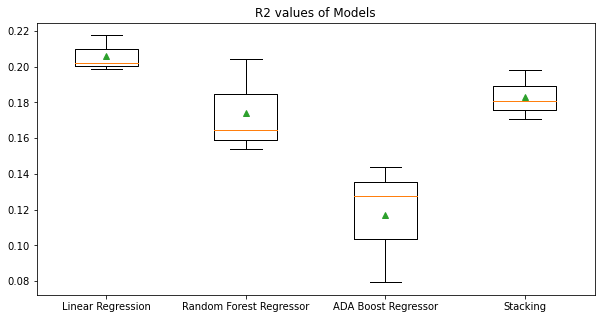

In [69]:
#visualizatiom
names=['Linear Regression','Random Forest Regressor','ADA Boost Regressor','Stacking']
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('R2 values of Models')
plt.boxplot([m1s1,m2s1,m3s1,m4s1], labels=names, showmeans=True);

#### Interpretation: R2 value of Stacking is high when compared to others

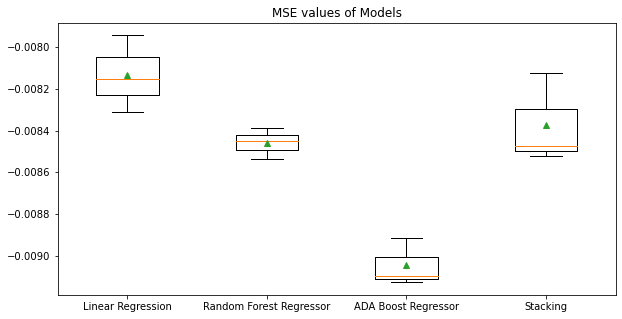

In [70]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('MSE values of Models')
plt.boxplot([m1s2,m2s2,m3s2,m4s2], labels=names, showmeans=True);

#### Interpretation : MSE of Stacking is high when compared to others.

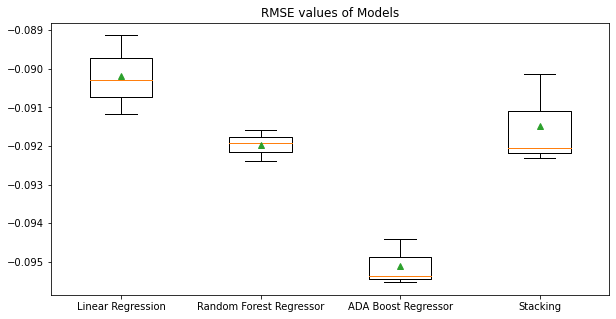

In [71]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('RMSE values of Models')
plt.boxplot([m1s3,m2s3,m3s3,m4s3], labels=names, showmeans=True);

#### Interpretation :RMSE value of stacking is high when compared to others

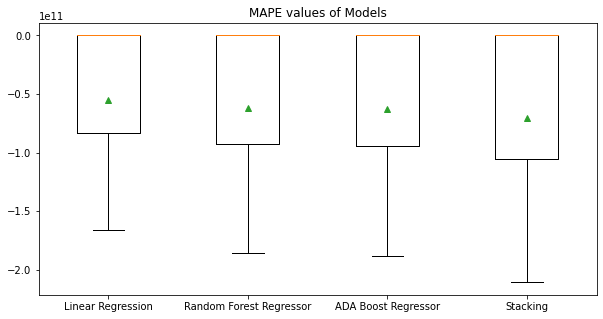

In [72]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('MAPE values of Models')
plt.boxplot([m1s4,m2s4,m3s4,m4s4], labels=names, showmeans=True);

#### Interpretation :MAPE of Stacking is high when compared to others.

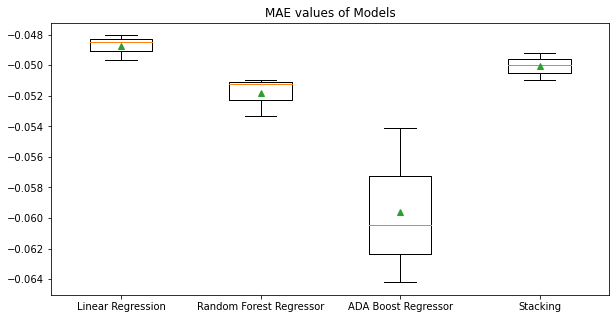

In [73]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('MAE values of Models')
plt.boxplot([m1s5,m2s5,m3s5,m4s5], labels=names, showmeans=True);

#### Interpretation: MAE value of Stacking is higher compared to other models.

#### Scatter Plot of Predicted and Actual Values of stacking

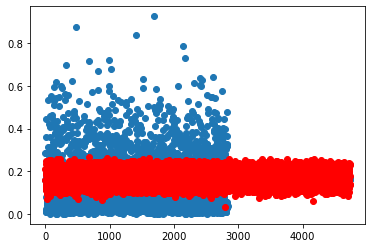

In [79]:
x=list(np.arange(0,len(y_test)))
plt.scatter(x,y_test)
plt.scatter(x,y4_pred,color='red');

#### Conclusion: From the analysis we can conclude that  most of predicted and actual values overlap each other & therefore performance of the model is good